# Confidence intervals

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams["figure.figsize"] = (20,15)

## Setup

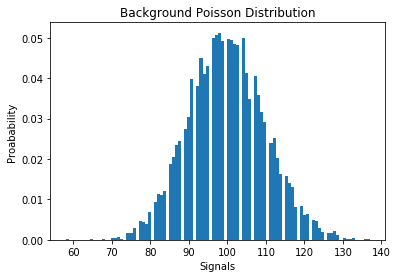

In [2]:
mu = 100
size = 10000
simBG = stats.poisson.rvs(mu, size=size)
plt.hist(simBG, 100, density=True)
plt.title('Background Poisson Distribution')
plt.xlabel('Signals')
plt.ylabel('Probability')
plt.show()

We are simulating 10,000 data points of a Poisson distribution but it seems from this simulation that we are getting a normal distribution. This is a result of the Central Limit Theorem that states as we increase the sample size every dataset of a certain distribution becomes more normal. Thus, this simulation of 10,000 datapoints adheres to Central Limit Theorem and becomes Gaussian. We also set the mean of this simulated background to be around 100.

## Problem 1

In [3]:
fiveSig = 1 - stats.norm.cdf(5)
fiveSigPoint = stats.poisson.ppf(1 - fiveSig, mu)
print('The right bound of 5\u03C3 is ', fiveSigPoint)
fiveSigLeft = stats.poisson.ppf(fiveSig, mu)
print('The left bound of 5\u03C3 is ', fiveSigLeft)

The right bound of 5σ is  154.0
The left bound of 5σ is  54.0


For the right bound we find the probability of the 5$\sigma$ point on a normal distribution and find where on this Poisson distribution we get the same probability. This gets us the right bound of 154. However, because the Poisson is not symmetric the left bound cannot be found with the right bound so you have to do 1 - prob(5$\sigma$) to get the probability your left bound should yield. Then when you search for this probability on the Poisson distribution you will get your left bound value.

## Problem 2

### a)

Injection value:  190.0


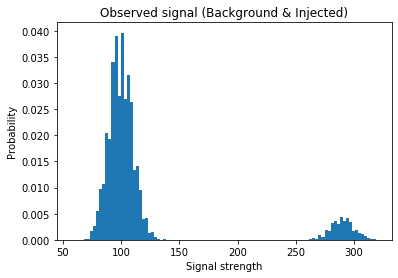

In [4]:
eightSig = 1 - stats.norm.cdf(8)
sigValue = stats.poisson.ppf(1 - eightSig, mu)
print('Injection value: ', sigValue)
for i in range(0, 10000, 10):
    num = 0
    simBG[i + num] = simBG[i + num] + sigValue
plt.hist(simBG, 100, density=True)
plt.title('Observed signal (Background & Injected)')
plt.xlabel('Signal strength')
plt.ylabel('Probability')
plt.show()

The background distribution is of a Poisson distribution with a mean of 100 and to this background we injected a signal of 8$\sigma$ to 10% of the background randomly. I calculated 8$\sigma$ by finding the probability of 8$\sigma$ on a normal distribution and then finding at what point in this Poisson background distribution there is a probability of this calculated 8$\sigma$ value. I "randomly" added the signal to the background by adding the signal value to a random datapoint every 20 values in the dataset so that 1000 or 10% of the values are affected by injected signal.

The histogram of the injected signal takes the shape of the background of a Poisson distribution however that is very difficult to see due to the CLT taking place in the background. Both histograms (background & signal) look very Gaussian. The histogram is telling us that for a signal of value 190 there is a background that follows that is Gaussian and has a mean of 100. What the distribution of the signal values tells you is the range of values you would observe if you performed the same measurement many times.

### b)

Whether an observed signal is biased or unbiased is a discussion about if your observed signal is where you expect it to be knowing the value of your injected signal. If we see that the observed signal is distributed around the injected signal value then we can say it is unbiased, otherwise it is said to be biased. In our example our injected signal of 8 sigma is at 190 and so we would expect the observed signal to be distributed around 190 if it was unbiased. However, we see that the observed signal is distributed around 290 and thus it is a biased signal and is a result of the mean of the background distribution at 100. For example, if the mean of the background distribution was at 0 then we could expect the observed signal to be distributed around 190.

## Problem 3 Make a suite of injected signals

Make a suite of injected signals that range from 0$\sigma$ to a $\sigma$ value well above 5$\sigma$

### a)

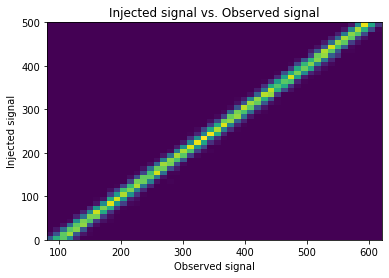

In [5]:
maxSig = 500
injSig = np.linspace(0, maxSig, 1000)
simData = stats.poisson.rvs(mu, size=[1000, 1000])
scratch, signal = np.meshgrid(injSig, injSig)
simObs = simData + signal

bg = stats.poisson.rvs(mu, size=size)
injSignal = np.linspace(0, maxSig, size)
obs = bg + injSignal

plt.hist2d(obs, injSignal, bins=(50,50), density=True)
plt.title('Injected signal vs. Observed signal')
plt.ylabel('Injected signal')
plt.xlabel('Observed signal')
plt.show()

In this problem we are looking for a suite of injected signals from 0$\sigma$ to above 30$\sigma$ instead of just one $\sigma$ value. However one difficulty we found was that when you calculated the probability of any $\sigma$ above 8$\sigma$ and then used this value to find where a certain sigma is on the observed distribution it does not work because the $\sigma$ when it is larger than 8$\sigma$ is so small that when you use ppf to find where the distribution has a probability this small it returns infinity. Thus we will just take the 0$\sigma$ value of 100 and call the end sigma range to be at 500 which is well beyond 290, the 8$\sigma$ value point on the distribution.

The histogram above is a 2-dimensional histogram and thus explains a different story than a 1-dimensional histogram. The above histogram represents the probability distribution of injected signals given the strengh of an observed signal so for example with an observed signal of around 300 we found the injected signal to be in a range of 180-220. Essentially we simulated the injected signals from a range of 0$\sigma$ to >30$\sigma$ and added it to the simulated background to find the distribution of possible injected signals given an observational signal.

* Note: In Miguel's slides using Matlab he puts in a two, two-dimensional arrays into the hist2d function however this does not seem to work in Python. Thus I have created two sets of data that represent the same data. One of these datasets are two, two-dimensional arrays created in the same way Miguel did. Another is of the same dataset just done in a modified way so that it will work with Python's hist2d function.

### b) Show that you get the same answer if you choose the injected signal in problem 2.

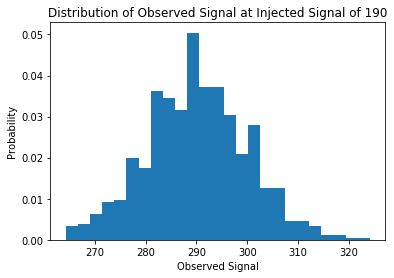

In [6]:
plt.hist(simObs[380], 25, density=True)
plt.title('Distribution of Observed Signal at Injected Signal of 190')
plt.xlabel('Observed Signal')
plt.ylabel('Probability')
plt.show()

As found in problem 2 when you have an injected signal of 190, or 8$\sigma$, you get a background signal distribution centered around 290. Thus we might expect similar behavior in this 2-dimensional histogram and this is what we will be looking for. Knowing the injected signal is 190 I search for the distribution of value associated with this injected signal value by looking up the index associated with 190 for the 'injSig' variable. I found this index by testing values until I could find the index of 380 which gives me 190. Then I plug this corresponding index value into sigObs, which is a 2-dimensional array that basically holds all of the observed signal values for each injected signal which allowed me to develop the 2-dimensional array, and plot the distribution of observed signals associated with this injected signal. We find that the mean of the distribution yeilds 290 which is expected from our results in problem 2.

On a more higher level understanding what we just did is determine the observed signal strength given an injected signal strength and the background noise. sigObs was the result of adding the injected signal to the background distribution. Thus our findings intuitively makes sense that the signal strength of the injected signal plus the background gives us our observed signal distribution as that would sum the noise and signals in our data to give us the sum, observed signal.

### c) Select an observed signal and create a 1D histogram of the injected signal pdf.

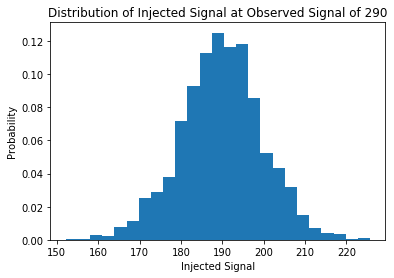

In [7]:
observation = 290
injected = signal[np.abs(simObs-observation) < .5]
weights = np.ones_like(injected)/float(len(injected)) # helps normalize histogram
binVal = plt.hist(injected, 25, weights=weights) # stores binned data
plt.title('Distribution of Injected Signal at Observed Signal of 290')
plt.xlabel('Injected Signal')
plt.ylabel('Probability')
plt.show()

Again with an injected signal of 190 you expect an observed signal distribution centered around 290. Here we will be testing to see if when we select the observed signal 290 if we are seeing the injected signal distribution being centered around 190. To find the injected signal I first gather all fo the indices where my observed signal differs from my observation strength by less than .5. Then I grab the signals corresponding to these index values which gives me an observation which gives me the distribution of the injected signal. From this I find that a signal as low as 160 or as high as 220 could have given me an observation of 290.

This histogram is essentially sharing the range of values the injected signal could have been to give an an observed signal of 290. It also shares that an injected signal of around 190 is most likely to return an observed signal of 290.

### d) For your observed signal, what is the 1LaTeX: \sigmaσ uncertainty on the true signal strength?

In [8]:
print('Right-side 1\u03C3 value: ', binVal[1][18])
print('Left-side 1\u03C3 value: ', binVal[1][9])

Right-side 1σ value:  205.12512512512512
Left-side 1σ value:  178.63863863863864


You cannot do inverse cdf to find the 1$\sigma$ values in this case because we only have a realization of the pdf trought the plotting of a histogram however we don't actually know what this pdf is. However, we know that a 1$\sigma$ uncertainty contains 66% of the true signal data. More specifically, the upper bound of 1$\sigma$ is 33% above the mean true signal and the lower bound of 1$\sigma$ is 33% below the mean of the true signal. Thus I will add the binned probabilities to an x value that will give me 33% to the right of the mean to get the upper bound and do it same to the left of the mean for the lower bound. An important thing to remember is that the histogram must be normalized so all probabilities sum to 1. This allows us to properly find 33% to right and left of mean.

Admittedly there leaves some room for error calculating the probabilities as binned probabilities because you are grouping values together however it is the best option we are faced with. I calculated that the upper bound 1$\sigma$ was bound was 205 and the lower bound 1$\sigma$ was about 178.

### e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?

As discussed previously the 1$\sigma$ bounds are 181 on the lower end and 203 on the upper end. This obviously implies that the distribution is not symmetric because the 1$\sigma$ values are at differing points at both ends of the distribution. This makes sense because we are looking at a distribution that is supposed to be Poisson distributed which has asymmetric shape.

## Problem 4

Using the same setup as in problem 3, now pick a relatively weak signal

### a) Repeat problem 3c, calculating the injected signal pdf()

1σ value:  110.0


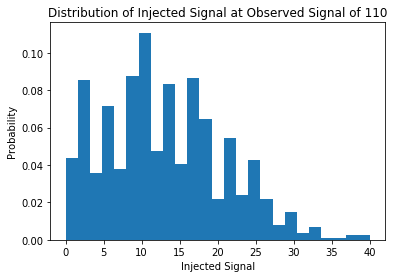

In [9]:
oneSig = 1 - stats.norm.cdf(1)
sig1 = stats.poisson.ppf(1 - oneSig, mu) # 1$\sigma$ point on Poisson distribution
print('1\u03C3 value: ', sig1)
injected = signal[np.abs(simObs-sig1) < .1]
weights = np.ones_like(injected)/float(len(injected)) # helps normalize histogram
plt.hist(injected, 25, weights=weights)
plt.title('Distribution of Injected Signal at Observed Signal of 110')
plt.xlabel('Injected Signal')
plt.ylabel('Probability')
plt.show()

Here we want a signal 1$\sigma$ or less and so I have decided to find the injected signal distribution corresponding to an injected signal of 1$\sigma$. To do this I found the probability of 1$\sigma$ on a normal distribution and found where this probability is found in our suite of injected signals. The 1$\sigma$ point was found to be 110 and so like in 3c I found all of the injected signal points where the observed signal subtracted by 110 passed a sensitivity of .1. You can see that the pdf here does extend to 0.

### b) Describe what it means to have the true signal pdf() extend to zero.

The fact that the true signal pdf extends to zero has the implication that it is possible that if we observe a signal of 110 we might not even be observing a true signal at all. More specifically, it is possible that the background signal matches the observed signal because in the process of subtracting the background from the observed signal these two cancel out to yield a 0 injected signal value. More succinctly, it is possible that the observed signal is created entirely by the background distribution.

### c) Calculate a 95% confidence upper bound.

In [10]:
conf95 = np.percentile(injected, 95)
print('95% confidence interval upper-bound is: ', conf95)

95% confidence interval upper-bound is:  26.026026026026024


The 95% confidence upper bound is equivalent to finding where the integral up to a point x of the above distribution will give me 95% of the total 'area' of the distribution. To calculate this point I used a function in the numpy package percentile which will calculate the bound that encapsulates 95% of the distribution. Another way of wording the information gathered here is that if we have an observed signal of 110, 95% of the time the true signal value will be 26.02 or less.